In [1]:
from pytdx.config.hosts import hq_hosts
import pandas as pd
from pytdx.hq import TdxHq_API
import seaborn as sns

In [2]:
def bollinger_bands(df, n, m):
    # takes dataframe on input
    # n = smoothing length
    # m = number of standard deviations away from MA
    
    #typical price
    TP = (df['high'] + df['low'] + df['close']) / 3
    # but we will use Adj close instead for now, depends
    
    data = df['close']
    #data = TP
    #data = df['Adj Close']
    
    # takes one column from dataframe
    B_MA = pd.Series((data.rolling(n, min_periods=n).mean()), name='B_MA')
    sigma = data.rolling(n, min_periods=n).std() 
    
    BU = pd.Series((B_MA + m * sigma), name='BU')
    BL = pd.Series((B_MA - m * sigma), name='BL')
    
    df = df.join(B_MA)
    df = df.join(BU)
    df = df.join(BL)
    
    return df

In [120]:
stocks = [(1, '600482','中国动力'), 
          (1, '588000','科创50ETF'), 
          (0, '300308','中际旭创'), 
          (1, '688777','中控技术')]

stock = stocks[3]

In [121]:
api = TdxHq_API()
host = hq_hosts[6]
n = 480   # datapoint rolling window
m = 2    # sigma width
df_lst = []
if api.connect(host[1], host[2]):
    print('Success')
    for i in range(4):
        df_lst += [api.to_df(api.get_security_bars(9, stock[0], stock[1], 0, 500))] # day k lines
        df_lst += [api.to_df(api.get_security_bars(2, stock[0], stock[1], 0, 500))] # 30 min k lines
        df_lst += [api.to_df(api.get_security_bars(0, stock[0], stock[1], 0, 500))] # 5 min k lines
        df_lst += [api.to_df(api.get_security_bars(8, stock[0], stock[1], 0, 500))] # 1 min k lines
        
    api.disconnect()

Success


In [122]:
df_lst[2].tail(10)

,open,close,high,low,vol,amount,year,month,day,hour,minute,datetime
490,44.37,44.40,44.40,44.30,209500.0,9291445.0,2024,2,28,14,15,2024-02-28 14:15
491,44.42,44.41,44.43,44.38,204000.0,9058205.0,2024,2,28,14,20,2024-02-28 14:20
492,44.42,44.14,44.44,44.10,362300.0,16040115.0,2024,2,28,14,25,2024-02-28 14:25
493,44.13,44.01,44.14,43.97,695000.0,30597196.0,2024,2,28,14,30,2024-02-28 14:30
494,44.05,44.27,44.45,44.05,268900.0,11905239.0,2024,2,28,14,35,2024-02-28 14:35
495,44.25,43.88,44.26,43.88,395400.0,17403042.0,2024,2,28,14,40,2024-02-28 14:40
496,43.88,43.86,43.88,43.62,497500.0,21785084.0,2024,2,28,14,45,2024-02-28 14:45
497,43.87,43.55,43.87,43.51,558000.0,24331720.0,2024,2,28,14,50,2024-02-28 14:50
498,43.59,43.54,43.67,43.50,437100.0,19041044.0,2024,2,28,14,55,2024-02-28 14:55
499,43.54,43.48,43.54,43.45,346500.0,15066536.0,2024,2,28,15,0,2024-02-28 15:00


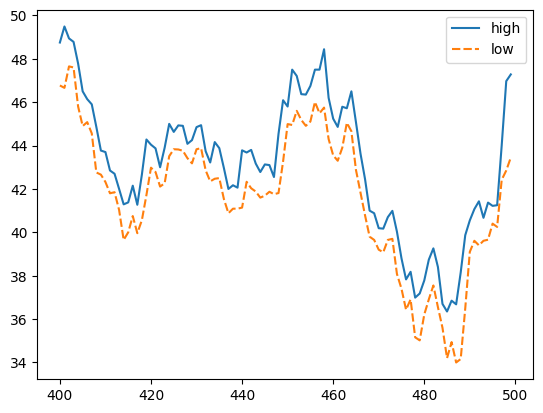

In [123]:
data = df_lst[0].tail(100)
sns.lineplot(data=data[['high','low']]); # day

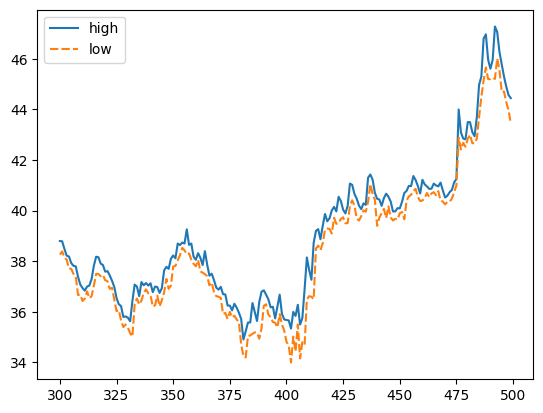

In [124]:
data = df_lst[1].tail(200)
sns.lineplot(data=data[['high','low']]); # 30 min

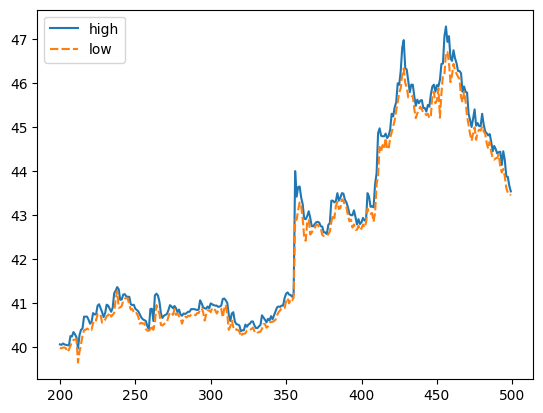

In [125]:
data = df_lst[2].tail(300)
sns.lineplot(data=data[['high','low']]); # 5 min

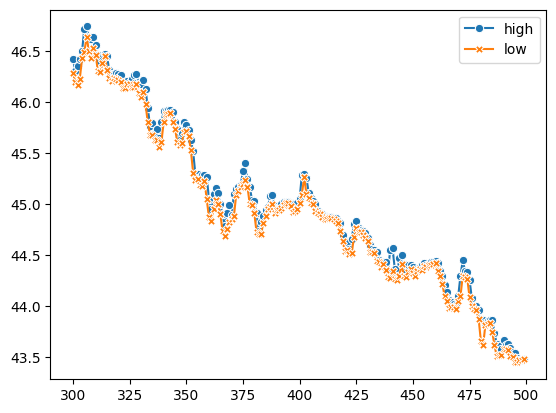

In [126]:
data = df_lst[3].tail(200)
sns.lineplot(data=data[['high','low']], markers=True, dashes=False);

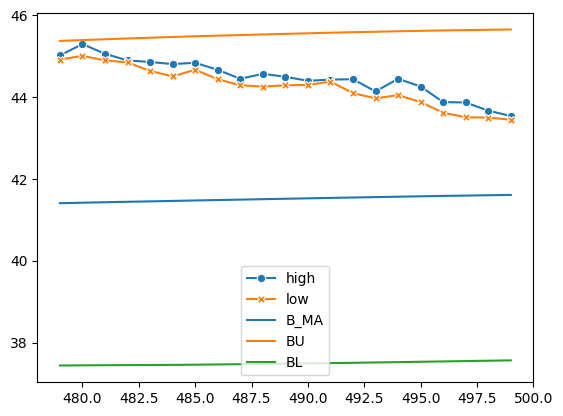

In [127]:
n = 480   # datapoint rolling window
m = 2    # sigma width
boll5 = bollinger_bands(df_lst[2], n, m) # 5 min
boll5_fix = boll5.loc[~boll5['B_MA'].isnull()]
sns.lineplot(data=boll5_fix[['high','low']], markers=True, dashes=False);
sns.lineplot(data=boll5_fix[['B_MA','BU','BL']], markers=False, dashes=False);

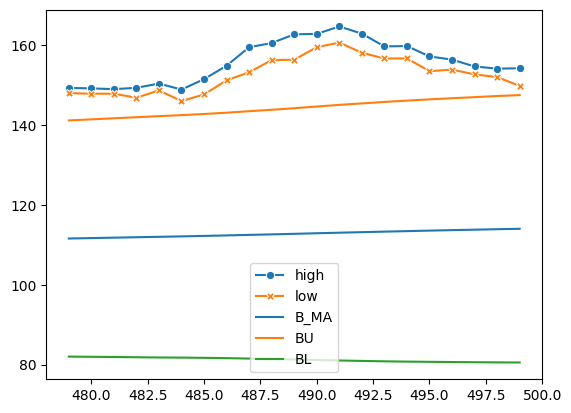

In [119]:
n = 480   # datapoint rolling window
m = 2    # sigma width
boll30 = bollinger_bands(df_lst[1], n, m) # 30 min
boll30_fix = boll30.loc[~boll30['B_MA'].isnull()]
sns.lineplot(data=boll30_fix[['high','low']], markers=True, dashes=False);
sns.lineplot(data=boll30_fix[['B_MA','BU','BL']], markers=False, dashes=False);